In [24]:
#QUITANDO LÍNEA BASE A PRIMERA COLUMNA (Linea base=Media del canal3)
#(Hay que restarle la media a cada bin de la primera columna)

import bz2
from numpy import*
from pylab import*
#import matplotlib.pyplot as pl 
#import numpy as np
#print("PRIMERA COLUMNA")
n = 0
pul=[]
cont=[]
ln=0
#with bz2.open( input ("Por favor, ingrese el nombre del archivo: "), "rt" ) as bz_file:
with bz2.open("Chitaga_2016_08_12_12h00.dat.bz2", "rt" ) as bz_file:
     for line in bz_file:
        rline = line.rstrip('\n').split(' ')
        if len(rline)==3: #Solo toma las filas con tres elementos
            #print( rline[0],rline[1],rline[2])
            if rline[0]=="#":
                ln=0
            if rline[0]!="#":
                if ln<=11:
                    pul.append(int(rline[0])-50) #Guarda datos de la primera columna sin linea base
                #else:
                    ln+=1
                #print("Pulso ",ln,": ",A)
        if len(rline)==4: #Solo toma las filas con tres elementos
            #print( rline[0],rline[1],rline[2])
            if rline[0]=="#" and rline[1]=="t":
                ln=0
                cont.append(int(rline[3]))      #Guarda los contadores respectivos de cada pulso
        #if len(pul)!=len(cont):
        #    break
        n+= 1
        if n == 10498762:
            break
#print('La cantidad de datos es ',len(pul))


#print(pul)
#plot(A)
#print(int(len(pul)/12))
#print(len(cont))


In [33]:
#Hallando el pico de cada pulso
N=int(len(pul)/12)
pul_list=[] #B
critpul=[]
cont_list=[]
P=[]
Q=[]
pu=[]
for i in range(1,N+1): #1,N+1
    n=12*i
    m=n-12
    #print(A[m:n])
    if pul[m:n]!=[]: #Para que de los N datos dividos en 12 no tome las listas vacias, solo toma las llenas
        pul_list.append(pul[m:n]) #Guarda listas de cada pulso en una lista mayor (lista de listas)
        #for l in pul_list:
         #   if len(l)==12:
         #       pu.append(pul_list[l])
#print(len(pul_list))
#print(pul_list)
#print(pul_list[8])
#print(len(cont))
#print(cont)
for j in range(0,len(pul_list)):
    l=pul_list[j]
    maximo=max(l)
            #if l: ##Para que no muestre el error max() arg is empty sequency 
            #    maximo=int(max(l))
            #else:
            #    len(l)==0
    P.append(maximo)              #Guarda los picos de cada pulso
    q=sum(pul_list[j])
    Q.append(q)                   #Guarda la carga de cada pulso. Sumatoria de voltajes
    #print('\nPulso ',j+1,' = ',l,'\n\tPico =',maximo,'\t Carga = ',q)
    
    #Aplicando criterio Q/P
    #Q/P=Diferenciador de ruido-señal
    Dif=Q[j]/P[j]
    if Dif>1.5:
        #print('\n\tQ/P =',round(Dif,4),'Cumple')
        critpul.append(pul_list[j]) # Guarda los pulsos que son señal; aquellos donde se cumple el criterio
        cont_list.append(cont[j])
    #else:
        #print('\n\tQ/P =',round(Dif,4),'No cumple')
#print(len(critpul))
#print(len(cont_list))
#print('\nLos picos de cada pulso son: ',P)
#print('\nLas cargas de cada pulso son: ',Q)
#print('\nLos pulsos con señal son:\n',critpul)
#print('\nLos contadores de los pulsos con señal son:\n',cont_list)


Valor mínimo  4
Valor máximo  31233041
La cantidad de datos de diferencias temporales es  618476


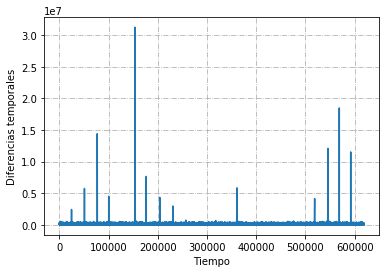

In [34]:
#Hallando el dt
#D=[]
#for k in critpul:  #Aplanar la lista
#    for l in k:
#        D.append(l)
#print(D)
#print(len(C))
dT=[]
for i in range(len(cont_list)):
    if i+1<len(cont_list):
        a=cont_list[i+1]-cont_list[i]
        if a>=0:
            dT.append(a)             #Guarda los datos de las diferencias temporales
    else:
        break
#print(dT)
print('\nValor mínimo ',min(dT))
print('Valor máximo ',max(dT))
print('La cantidad de datos de diferencias temporales es ',len(dT))
plot(dT)
xlabel('Tiempo')
ylabel('Diferencias temporales')
grid('on',ls='-.')
show()

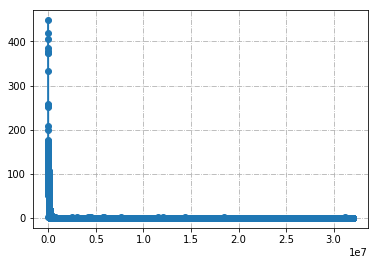

In [35]:
#Histograma

hist1 = [] # Array for histogram
startBin = 0. #Valores alrededor de datos de la lista
endBin = 32000000. 
nbins = 3200000
binwidth = (endBin - startBin) / nbins


[hist1.append(0) for i in range(nbins)] # Inizialiting histo

# Filling histogram
for i in dT:
    
    hist1[ int((i/binwidth)) ] += 1 #El 40 es para que la lista no se salga del rango

bines1=[]
[bines1.append((i)*binwidth) for i in range(nbins)]   

plot(bines1, hist1, 'o-')
#xlim(0,5000)
#ylim(1,)
#yscale('log')
grid('on',ls='-.')
show()

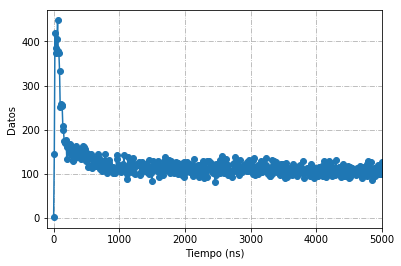

In [36]:
plot(bines1, hist1, 'o-')
xlim(-100,5000)
#ylim(1,)
#yscale('log')
xlabel('Tiempo (ns)')
ylabel('Datos')
grid('on',ls='-.')
show()

En el presente notebook se realizó un analisis del comportamiento de detector Cherenkov en cuanto a los voltajes medidos en una cantidades de tiempos determinadas.

EL primer paso a realizar fue quitar la línea base de cada pulso, logrando así querdarnos simplemente con lo que es señal; ésto se hizo a partir de conocer la media del canal tres en el conjunto de datos del Cherenkov, la cual fue 50 y se realizó en el notebook anterior. Después de esto se halló el pico y la carga ($Q=\sum V_{i}$) de cada pulso con el fin de analizar el criterio que nos permite estudiar en completitud el comportamiento del dispositivo. $\frac{Q}{P} \equiv Diferenciador de Ruido-Señal$

La importancia de este criterio radica en tomar los pulsos en los cuales $ \frac{Q}{P} \geq 1$ pues es en estos donde realmente existe señal. Si $ \frac{Q}{P} \leq 1$ los datos constituyen ruido lo cual no tiene aporte en el estudio.

En mi caso se tuvieron en cuenta aquellos pulsos en los que $ \frac{Q}{P} \geq 1.5$ reconociendo así señales de particulas que dejaron una carga representativa en el detector.

Finalmente se guardaron los datos temporales de los pulsos que cumplieron el criterio del diferenciador de Ruido-Señal y se realizó $\Delta t$ y se realizó el histograma. 

Cabe resaltar que la forma del histograma depende del criterio que se establezca pues si se toman todos los datos desde 1, la gráfica es mucho más suave. 